In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sn
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('./BreastCancer.csv')
df = df.drop('Id', axis=1)
df = df.dropna()
df.head(1000)

,Cl.thickness,Cell.size,Cell.shape,Marg.adhesion,Epith.c.size,Bare.nuclei,Bl.cromatin,Normal.nucleoli,Mitoses,Class
0,5,1,1,1,2,1.0,3,1,1,0
1,5,4,4,5,7,10.0,3,2,1,0
2,3,1,1,1,2,2.0,3,1,1,0
3,6,8,8,1,3,4.0,3,7,1,0
4,4,1,1,3,2,1.0,3,1,1,0
...,...,...,...,...,...,...,...,...,...,...
694,3,1,1,1,3,2.0,1,1,1,0
695,2,1,1,1,2,1.0,1,1,1,0
696,5,10,10,3,7,3.0,8,10,2,1
697,4,8,6,4,3,4.0,10,6,1,1


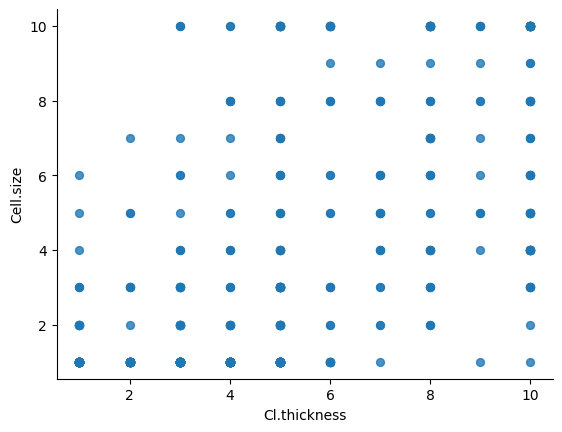

In [5]:
df.plot(kind='scatter', x='Cl.thickness', y='Cell.size', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [6]:
X = df[['Cl.thickness', 'Cell.size', 'Cell.shape', 'Marg.adhesion', 'Epith.c.size', 'Bare.nuclei', 'Bl.cromatin', 'Normal.nucleoli', 'Mitoses']]
y = df['Class']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)

In [7]:
logistic_regression= LogisticRegression()
logistic_regression.fit(X_train,y_train)
y_pred=logistic_regression.predict(X_test)

In [8]:
logistic_regression.coef_

array([[0.41727649, 0.10174544, 0.27544431, 0.21168599, 0.25737049,
        0.44053494, 0.32713769, 0.23683206, 0.18593051]])

In [9]:
y_pred

array([0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0])

In [10]:
y_test

115    0
392    0
316    1
519    1
313    0
      ..
458    0
165    0
331    0
80     0
94     0
Name: Class, Length: 171, dtype: int64

Accuracy:  0.9473684210526315


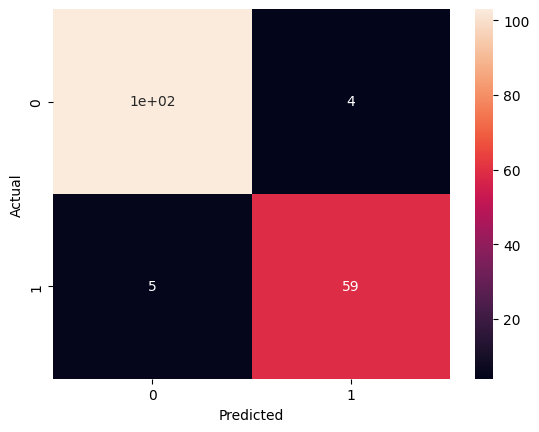

In [11]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))

In [12]:
import random
teste = {
    'Cl.thickness': random.randint(1, 10),
    'Cell.size': random.randint(1, 10),
    'Cell.shape': random.randint(1, 10),
    'Marg.adhesion': random.randint(1, 10),
    'Epith.c.size': random.randint(1, 10),
    'Bare.nuclei': random.randint(1, 10),
    'Bl.cromatin': 5,
    'Normal.nucleoli': 2,
    'Mitoses': 1
}
dft = pd.DataFrame(data = teste,index=[0])
display(dft)
resultado = logistic_regression.predict(dft)
probabilidade = logistic_regression.predict_proba(dft)
print("Resuldado: ",resultado)
print("Probabilidade Positiva: ", probabilidade[0][1])

,Cl.thickness,Cell.size,Cell.shape,Marg.adhesion,Epith.c.size,Bare.nuclei,Bl.cromatin,Normal.nucleoli,Mitoses
0,6,6,1,9,8,5,5,2,1


Resuldado:  [1]
Probabilidade Positiva:  0.9165094859840336
